In [1]:
import pandas as pd
import numpy as np
import csv
import glob, os
from datetime import datetime

Variables: OD(organic soil layer depth), ts (soil temperature), Re (ecosystem respiration),
NEE (net ecosysem exchange), GPP (gross primary productivity), C (% soil carbon), N (% soil nitrogen), bulk density, biomass,
vwc (volumetric water content)

In [63]:
EMLurl1="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/537_RS_alt_data.txt"# contains variable:OD (organic layer depth) no time stamp
EMLurl2="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/534_footprint_alt_2008.txt"
EMLurl3="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/447_healy_EC_gapfilled_09.txt"
EMLurl4="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/366_Healy_Soil_C_and_N_inventory.txt"
EMLurl5="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/428_EMLfluxes.txt"
EMLurl6="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/705_EML_AK_Gradient_BiomassBySpecies_2017.csv"
EMLurl7="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/706_EML_AK_Gradient_Foliar_C,N,P,Ca,Mg,SLA_Peak_2017.csv"
EMLurl8="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/455_ThawGradientAK_CarbonFluxes_2004-2006.txt"
EMLurl9="https://www.lter.uaf.edu/php/download_data.php?f=/data_files/ascii/files/455_ThawGradientAK_CarbonFluxes_2007-2010.txt"

In [64]:
EMLdf1=pd.read_csv(EMLurl1)
EMLdf2=pd.read_csv(EMLurl2)
EMLdf3=pd.read_csv(EMLurl3)
EMLdf4=pd.read_csv(EMLurl4)
EMLdf5=pd.read_csv(EMLurl5)
EMLdf6=pd.read_csv(EMLurl6)
EMLdf7=pd.read_csv(EMLurl7)
EMLdf8=pd.read_csv(EMLurl8)
EMLdf9=pd.read_csv(EMLurl9)

Eight Mile Lake-Thaw Gradient Carbon Flux Datasets

In [16]:
emlcf1 =pd.read_csv(EMLurl8
          ,skiprows=1
            ,sep=","  
           , names=[
                    "Year",     
                    "Month",     
                    "Doy",     
                    "Hour",     
                    "Chamb",     
                    "Site",     
                    "Tair",     
                    "PAR",     
                    "NEE",     
                    "Re",     
                    "GPP",     
                    "filled"    ],na_values={'-9999','NaN'})

In [42]:
emlcf2 =pd.read_csv(EMLurl9
          ,skiprows=1
            ,sep=","  
           , names=[
                    "Year",     
                    "Month",     
                    "Doy",     
                    "Hour",     
                    "Chamb",     
                    "Site",     
                    "Tair",     
                    "PAR",     
                    "NEE",     
                    "Re",     
                    "GPP",     
                    "filled"    ],na_values={'-9999','NaN'})

In [19]:
emlcf1.describe()

,Year,Month,Doy,Hour,Chamb,Tair,PAR,NEE,Re,GPP,filled
count,123308.000000,123308.000000,123308.000000,123308.000000,123209.000000,123308.000000,123308.000000,89459.000000,122427.000000,122774.000000,123308.000000
mean,2005.123382,7.161279,202.866919,11.571106,17.980935,12.486526,361.412949,0.938591,-2.396901,3.224809,0.914507
std,0.810806,0.953379,29.319073,6.887114,10.362483,5.738060,399.519489,2.511202,0.924847,2.984233,0.279615
min,2004.000000,4.000000,121.000000,0.000000,1.000000,-14.444444,0.000000,-9.182719,-11.200560,0.000000,0.000000
25%,2004.000000,6.000000,179.000000,6.000000,9.000000,8.510000,12.600000,-1.330329,-2.831598,0.000000,1.000000
50%,2005.000000,7.000000,203.000000,12.000000,17.000000,12.000000,210.780600,1.028233,-2.231605,3.095814,1.000000
75%,2006.000000,8.000000,227.000000,17.000000,27.000000,16.000000,594.800000,2.596070,-1.767006,5.238214,1.000000
max,2006.000000,9.000000,264.000000,24.000000,35.000000,37.222222,2350.000000,18.744286,-0.009352,24.070000,1.000000


<AxesSubplot:>

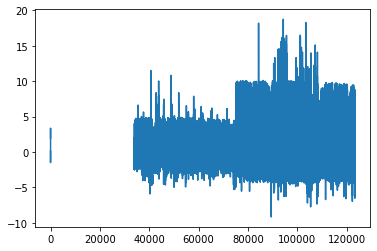

In [20]:

emlcf1.NEE.plot()

In [43]:
emlcf2.describe()

,Year,Month,Doy,Hour,Chamb,Tair,PAR,NEE,Re,GPP,filled
count,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330918.000000,330914.000000,241352.000000,330918.000000
mean,2008.797237,6.992282,197.148378,12.197593,17.984637,9.546084,303.363055,0.822493,-2.190732,4.131245,0.045395
std,1.167679,1.410592,44.122837,6.933175,10.377258,6.112107,355.918879,2.793848,1.005802,3.300454,0.208169
min,2007.000000,5.000000,121.000000,0.000000,1.000000,-40.005390,-0.130713,-11.671900,-11.790075,-9.210526,0.000000
25%,2008.000000,6.000000,159.000000,6.000000,9.000000,5.830000,2.658936,-1.258037,-2.753909,1.702345,0.000000
50%,2009.000000,7.000000,197.000000,12.000000,17.000000,9.676695,156.395750,0.154716,-2.053975,3.356724,0.000000
75%,2010.000000,8.000000,235.000000,18.000000,27.000000,13.740000,510.295800,2.423842,-1.474020,6.239087,0.000000
max,2010.000000,9.000000,274.000000,24.000000,35.000000,29.630000,1960.882000,19.102029,7.350334,22.779822,1.000000


<AxesSubplot:>

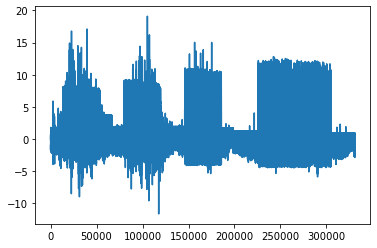

In [21]:
emlcf2.NEE.plot()

In [46]:
emlcfconcat=pd.concat([emlcf1,emlcf2])

Added a seperate Date column from Year and Doy 

In [50]:
emlcfconcat['Date']=pd.to_datetime(emlcfconcat['Year'] * 1000 + emlcfconcat['Doy'], format='%Y%j')

In [51]:
emlcfconcat.head()

,Year,Month,Doy,Hour,Chamb,Site,Tair,PAR,NEE,Re,GPP,filled,Date
0,2004,5,128,12.0,1.0,Ext,1.1,500.0,0.10,NaN,NaN,0,2004-05-07
1,2004,5,128,12.0,3.0,Ext,1.1,500.0,-0.64,NaN,NaN,0,2004-05-07
2,2004,5,128,12.0,5.0,Ext,1.1,500.0,-0.55,NaN,NaN,0,2004-05-07
3,2004,5,128,12.0,7.0,Ext,1.1,500.0,-0.97,NaN,NaN,0,2004-05-07
4,2004,5,128,12.0,9.0,Ext,1.1,500.0,-1.50,NaN,NaN,0,2004-05-07


In [47]:
emlcfconcat.describe()

,Year,Month,Doy,Hour,Chamb,Tair,PAR,NEE,Re,GPP,filled
count,454226.000000,454226.000000,454226.000000,454226.000000,454127.000000,454226.000000,454226.000000,420377.000000,453341.000000,364126.000000,454226.000000
mean,2007.799901,7.038159,198.700781,12.027522,17.983632,10.344321,319.121766,0.847200,-2.246409,3.825618,0.281331
std,1.959896,1.304608,40.720324,6.926299,10.373240,6.153412,369.169179,2.736555,0.988841,3.225913,0.449649
min,2004.000000,4.000000,121.000000,0.000000,1.000000,-40.005390,-0.130713,-11.671900,-11.790075,-9.210526,0.000000
25%,2006.000000,6.000000,166.000000,6.000000,9.000000,6.500000,3.748500,-1.271722,-2.776215,1.318772,0.000000
50%,2008.000000,7.000000,199.000000,12.000000,17.000000,10.340000,171.264000,0.298639,-2.110811,3.284440,0.000000
75%,2010.000000,8.000000,232.000000,18.000000,27.000000,14.416510,533.453200,2.501742,-1.562408,5.803056,1.000000
max,2010.000000,9.000000,274.000000,24.000000,35.000000,37.222222,2350.000000,19.102029,7.350334,24.070000,1.000000


<AxesSubplot:>

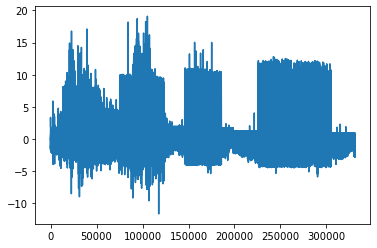

In [48]:
emlcfconcat.NEE.plot()

Export concatenated EML Carbon Flux datasets for years 2004-2010

In [ ]:
emlcfconcat.to_csv('455_ThawGradientAK_CarbonFluxes_2004-2010.csv')

Eight Mile Lake-Thaw Gradient, Ecosystem carbon balance

In [65]:
EMLdf3.head()

,Year,Month,Day,time,week,PPFD,netrad,TA,TA K,Ts,...,Calculated NEE,Calculated Re,Unnamed: 19,gapfilled reco,gapfilled NEE,Unnamed: 22,GEP,NEE g Cm-2,GEP g Cm-2,Re g Cm-2
0,2009,3,24,0.0,12,0.0,-38.20696,-17.75414,255.4,-8.09,...,0.568647,0.568647,NaN,1.329369,1.329369,NaN,0.0,0.028738,0.0,0.028738
1,2009,3,24,0.5,12,0.0,-37.47469,-18.47527,254.7,-8.08,...,0.569272,0.569272,NaN,1.318850,1.318850,NaN,0.0,0.028511,0.0,0.028511
2,2009,3,24,1.0,12,0.0,-38.34639,-18.50944,254.6,-8.08,...,0.569272,0.569272,NaN,1.861610,1.861610,NaN,0.0,0.040244,0.0,0.040244
3,2009,3,24,1.5,12,0.0,-37.35448,-19.57649,253.6,-8.07,...,0.569898,0.569898,NaN,0.569898,0.569898,NaN,0.0,0.012320,0.0,0.012320
4,2009,3,24,2.0,12,0.0,-37.38875,-19.30055,253.8,-8.07,...,0.569898,0.569898,NaN,1.484271,1.484271,NaN,0.0,0.032087,0.0,0.032087


In [66]:
#Re-format Date to match that of other datasets: Year, Month, Day
EMLdf3['Date']= pd.to_datetime(EMLdf3[['Year','Month','Day']],format='%Y-%m-%d')
EMLdf3["Doy"]=EMLdf3['Date'].dt.dayofyear
EMLdf3.head()

,Year,Month,Day,time,week,PPFD,netrad,TA,TA K,Ts,...,Unnamed: 19,gapfilled reco,gapfilled NEE,Unnamed: 22,GEP,NEE g Cm-2,GEP g Cm-2,Re g Cm-2,Date,Doy
0,2009,3,24,0.0,12,0.0,-38.20696,-17.75414,255.4,-8.09,...,NaN,1.329369,1.329369,NaN,0.0,0.028738,0.0,0.028738,2009-03-24,83
1,2009,3,24,0.5,12,0.0,-37.47469,-18.47527,254.7,-8.08,...,NaN,1.318850,1.318850,NaN,0.0,0.028511,0.0,0.028511,2009-03-24,83
2,2009,3,24,1.0,12,0.0,-38.34639,-18.50944,254.6,-8.08,...,NaN,1.861610,1.861610,NaN,0.0,0.040244,0.0,0.040244,2009-03-24,83
3,2009,3,24,1.5,12,0.0,-37.35448,-19.57649,253.6,-8.07,...,NaN,0.569898,0.569898,NaN,0.0,0.012320,0.0,0.012320,2009-03-24,83
4,2009,3,24,2.0,12,0.0,-37.38875,-19.30055,253.8,-8.07,...,NaN,1.484271,1.484271,NaN,0.0,0.032087,0.0,0.032087,2009-03-24,83


In [67]:
EMLdf3=EMLdf3.rename(columns={'Re g Cm-2':'Re'})

In [68]:
EMLdf3.head()

,Year,Month,Day,time,week,PPFD,netrad,TA,TA K,Ts,...,Unnamed: 19,gapfilled reco,gapfilled NEE,Unnamed: 22,GEP,NEE g Cm-2,GEP g Cm-2,Re,Date,Doy
0,2009,3,24,0.0,12,0.0,-38.20696,-17.75414,255.4,-8.09,...,NaN,1.329369,1.329369,NaN,0.0,0.028738,0.0,0.028738,2009-03-24,83
1,2009,3,24,0.5,12,0.0,-37.47469,-18.47527,254.7,-8.08,...,NaN,1.318850,1.318850,NaN,0.0,0.028511,0.0,0.028511,2009-03-24,83
2,2009,3,24,1.0,12,0.0,-38.34639,-18.50944,254.6,-8.08,...,NaN,1.861610,1.861610,NaN,0.0,0.040244,0.0,0.040244,2009-03-24,83
3,2009,3,24,1.5,12,0.0,-37.35448,-19.57649,253.6,-8.07,...,NaN,0.569898,0.569898,NaN,0.0,0.012320,0.0,0.012320,2009-03-24,83
4,2009,3,24,2.0,12,0.0,-37.38875,-19.30055,253.8,-8.07,...,NaN,1.484271,1.484271,NaN,0.0,0.032087,0.0,0.032087,2009-03-24,83


<AxesSubplot:>

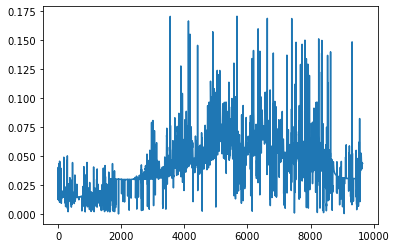

In [69]:
EMLdf3.Re.plot()

<AxesSubplot:>

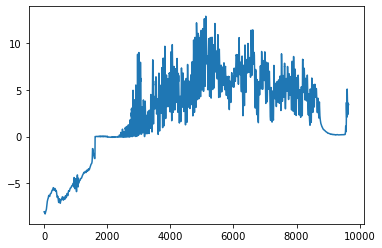

In [70]:
EMLdf3.Ts.plot()

<AxesSubplot:>

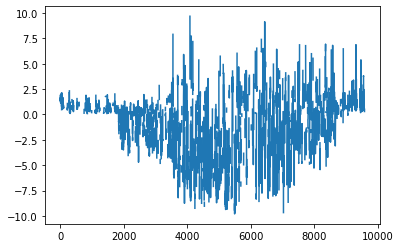

In [71]:
EMLdf3.NEE.plot()

When ready to export as a csv

In [158]:
EMLdf3.to_csv('447_healy_EC_gapfilled_09_Updated.csv')

Thaw Gradient: Eight Mile Lake soil carbon and nitrogen

In [10]:

EMLdf4=EMLdf4.rename(columns={'%N':'Nitrogen','%C':'Carbon'})

In [11]:
EMLdf4.head()

,Site,Core,O or M,Layer,Depth,Nitrogen,Carbon,delta14N,delta13C,gN/m2,gC/m2,BulkDensity
0,Mod,1,O,0-5,5.0,0.70,43.57,-4.32,-27.79,22.50,1408.64,0.0647
1,Mod,1,O,5-15,10.0,0.76,42.97,-1.40,-26.45,49.58,2792.39,0.0650
2,Mod,1,O,15-25,10.0,1.41,40.05,0.89,-25.28,187.77,4959.11,0.1238
3,Mod,1,O,25-35,10.0,1.87,41.95,1.53,-25.51,307.90,6900.06,0.1645
4,Mod,1,O,35+,5.0,1.55,33.93,1.09,-26.66,190.13,4156.86,0.2450


<AxesSubplot:>

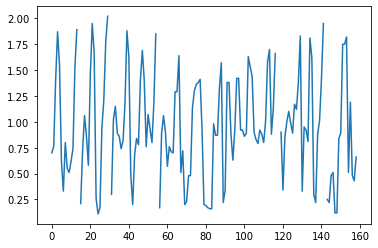

In [17]:
EMLdf4.Nitrogen.plot()

<AxesSubplot:>

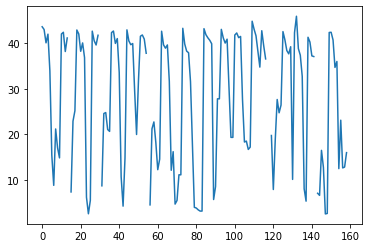

In [15]:
EMLdf4.Carbon.plot()

When ready to export

In [ ]:
#EMLdf4.to_csv('366_Healy_Soil_C_and_N_inventory_Updated.csv')

Eight Mile Lake Research Watershed, Thaw Gradient: Growing season CO2 fluxes and several ecosystem measurements

In [34]:
EMLdf5.head()

,Site,Reco,NEE,GPP,MT,NDVI,TD,VWC,T,Biomass
0,Min01,1.004,1.502,2.507,-0.72,0.741,38.6,0.27,2.60,236.4
1,Min02,1.717,2.140,3.859,-0.72,0.765,47.7,0.27,1.61,155.1
2,Min03,2.370,2.538,4.910,0.06,0.702,35.7,0.15,3.15,629.6
3,Min04,2.071,2.092,4.165,-0.31,0.710,35.0,0.17,5.89,379.6
4,Min05,2.443,1.466,3.911,-0.26,0.757,37.4,0.20,3.22,634.7


In [35]:
EMLdf5=EMLdf5.rename(columns={'Reco':'Re'})

In [36]:
EMLdf5.head()

,Site,Re,NEE,GPP,MT,NDVI,TD,VWC,T,Biomass
0,Min01,1.004,1.502,2.507,-0.72,0.741,38.6,0.27,2.60,236.4
1,Min02,1.717,2.140,3.859,-0.72,0.765,47.7,0.27,1.61,155.1
2,Min03,2.370,2.538,4.910,0.06,0.702,35.7,0.15,3.15,629.6
3,Min04,2.071,2.092,4.165,-0.31,0.710,35.0,0.17,5.89,379.6
4,Min05,2.443,1.466,3.911,-0.26,0.757,37.4,0.20,3.22,634.7


When ready to export

In [ ]:
#EMLdf5.to_csv('428_EMLfluxes_Updates.csv')

In [72]:
EMLdf6.head()

,date,site,plot,species,avghits,biomass
0,2017-07-27,Extensive Thaw,1,AND,0.0000,0.000000
1,2017-07-27,Extensive Thaw,1,AUL,0.0000,0.000000
2,2017-07-27,Extensive Thaw,1,BN,0.0000,0.000000
3,2017-07-27,Extensive Thaw,1,CX,0.1875,14.953125
4,2017-07-27,Extensive Thaw,1,DIC,0.0000,0.000000


In [74]:
EMLdf6['Month']=pd.DatetimeIndex(EMLdf6['date']).month
EMLdf6['Year']=pd.DatetimeIndex(EMLdf6['date']).year
EMLdf6['Doy']=pd.DatetimeIndex(EMLdf6['date']).dayofyear

In [75]:
EMLdf6.head()

,date,site,plot,species,avghits,biomass,Month,Year,Doy
0,2017-07-27,Extensive Thaw,1,AND,0.0000,0.000000,7,2017,208
1,2017-07-27,Extensive Thaw,1,AUL,0.0000,0.000000,7,2017,208
2,2017-07-27,Extensive Thaw,1,BN,0.0000,0.000000,7,2017,208
3,2017-07-27,Extensive Thaw,1,CX,0.1875,14.953125,7,2017,208
4,2017-07-27,Extensive Thaw,1,DIC,0.0000,0.000000,7,2017,208


<AxesSubplot:>

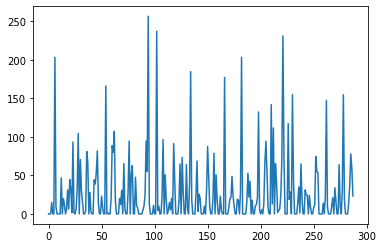

In [76]:
EMLdf6.biomass.plot()

In [ ]:
#EMLdf6.to_csv('705_EML_AK_Gradient_BiomassBySpecies_2017.csv')

In [77]:
EMLdf7.head()

,date,site,base,species,SLA,%C,d13C,%N,d15N,%P,%Ca,%Mg,notes
0,2017-07-17,Extensive Thaw,1,VVI,77.76,49.599,-27.399,1.446,-8.155,0.169,0.25,0.11,NaN
1,2017-07-17,Extensive Thaw,1,RO,68.12,53.640,-27.003,1.778,-5.952,0.165,0.23,0.10,NaN
2,2017-07-17,Extensive Thaw,1,CX,110.07,45.799,-25.907,2.498,1.694,0.159,0.14,0.12,NaN
3,2017-07-17,Extensive Thaw,1,BN,114.95,48.794,-29.786,2.013,-7.796,0.230,0.35,0.16,NaN
4,2017-07-17,Extensive Thaw,1,EV,72.51,46.560,-26.595,2.100,1.648,0.196,0.06,0.09,NaN


In [78]:
EMLdf7['Month']=pd.DatetimeIndex(EMLdf7['date']).month
EMLdf7['Year']=pd.DatetimeIndex(EMLdf7['date']).year
EMLdf7['Doy']=pd.DatetimeIndex(EMLdf7['date']).dayofyear

EMLdf7=EMLdf7.rename(columns={'%N':'Nitrogen','%C':'Carbon'})

Eight Mile Lake-Thaw Gradient Foliar Carbon and Nitrogen 2017

In [79]:
EMLdf7.head()

,date,site,base,species,SLA,Carbon,d13C,Nitrogen,d15N,%P,%Ca,%Mg,notes,Month,Year,Doy
0,2017-07-17,Extensive Thaw,1,VVI,77.76,49.599,-27.399,1.446,-8.155,0.169,0.25,0.11,NaN,7,2017,198
1,2017-07-17,Extensive Thaw,1,RO,68.12,53.640,-27.003,1.778,-5.952,0.165,0.23,0.10,NaN,7,2017,198
2,2017-07-17,Extensive Thaw,1,CX,110.07,45.799,-25.907,2.498,1.694,0.159,0.14,0.12,NaN,7,2017,198
3,2017-07-17,Extensive Thaw,1,BN,114.95,48.794,-29.786,2.013,-7.796,0.230,0.35,0.16,NaN,7,2017,198
4,2017-07-17,Extensive Thaw,1,EV,72.51,46.560,-26.595,2.100,1.648,0.196,0.06,0.09,NaN,7,2017,198


<AxesSubplot:>

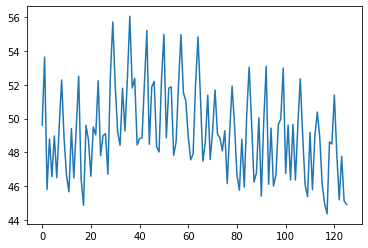

In [80]:
EMLdf7.Carbon.plot()

In [ ]:
EMLdf7.to_csv('706_EML_AK_Gradient_Foliar_C,N,P,Ca,Mg,SLA_Peak_2017_Updated.csv')